## Constant Fraction Discriminator (CFD)

In [2]:
# Importing libraries
import numpy as np # for mathematical functions and arrays
import matplotlib.pyplot as plt # for plotting

In [3]:
# Let's take 2 signals with different amplitudes
ts1=0 # time of arrival for signal 1 
ts2=0 # time of arrival for signal 2
N=200 # Number of data points
# Parameters of preamplified signal for HPGe Detector
tau=10
theta=8
# Parameters for Constant Fraction Signal
Attenuate_factor=0.5
# Delay time with reference to starting time
t_delay=62
t_monoshoot=10 # pulse width for logic signal
t=np.linspace(0,70,N) # time for which signal remains
# time window in which signal is plotted with reference to start time
t1=ts1+t
t2=ts2+t
# Positional Delay time with reference to t=0
t1_delay=ts1+t_delay
t2_delay=ts2+t_delay
V_CFD1=(np.exp(-t/tau)-np.exp(-t/theta))/(tau-theta)
V_CFD2=2*(np.exp(-t/tau)-np.exp(-t/theta))/(tau-theta)

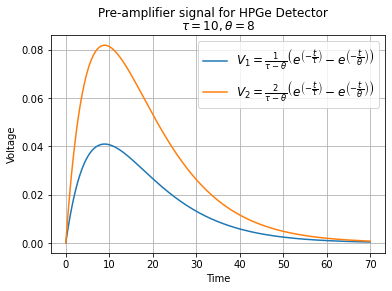

In [4]:
# Plotting and labelling
plt.plot(t1,V_CFD1,label=r'$V_1=\frac{1}{\tau-\theta}\left(e^{\left(-\dfrac{t}{\tau}\right)}-e^{\left(-\dfrac{t}{\theta}\right)}\right)$')
plt.plot(t2,V_CFD2,label=r'$V_2=\frac{2}{\tau-\theta}\left(e^{\left(-\dfrac{t}{\tau}\right)}-e^{\left(-\dfrac{t}{\theta}\right)}\right)$')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.legend(loc='upper right',fontsize=12)
plt.suptitle("Pre-amplifier signal for HPGe Detector")
plt.title(r'$\tau=10, \theta=8$')
#plt.tick_params(labelsize=12)
plt.grid()
plt.show()

### Forming Constant Fraction Signal
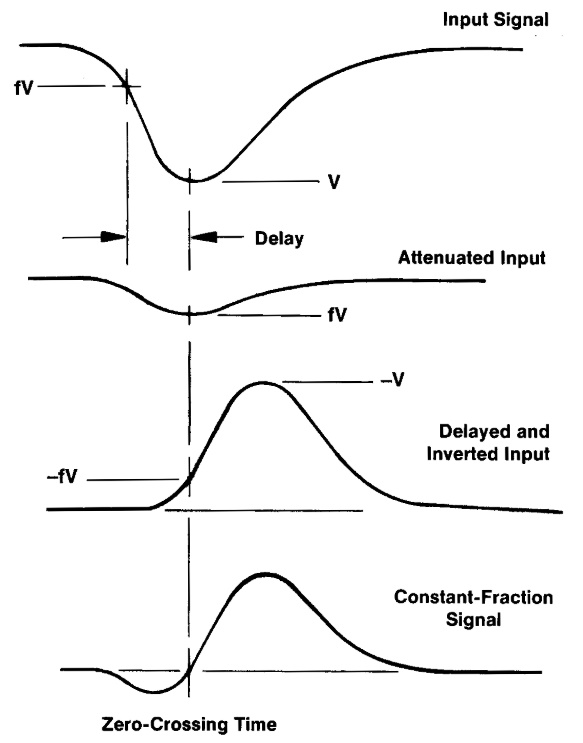

In [5]:
# Let's form the constant fraction signal
V_CFD1_attenuated=Attenuate_factor*V_CFD1
V_CFD1_reversed=-V_CFD1
V_CFD2_attenuated=Attenuate_factor*V_CFD2
V_CFD2_reversed=-V_CFD2

# To make time delay array corresponding to extended signal due to delay
# It should be divided with same step size as in main time array
n1=int(1+(t1_delay*(N-1)/(max(t)-min(t))))
n2=int(1+(t2_delay*(N-1)/(max(t)-min(t))))
t1_delay_part1=np.linspace(max(t1),max(t1)+t_delay,n1)
t1_delay_part2=np.linspace(min(t1),min(t1)+t_delay,n1)
t2_delay_part1=np.linspace(max(t2),max(t2)+t_delay,n2)
t2_delay_part2=np.linspace(min(t2),min(t2)+t_delay,n2)
t1_new=np.concatenate((t1,t1_delay_part1[1:]),axis=0)
#t1_new=np.concatenate((t1_delay_part2[:-1],t1+t_delay),axis=0)
t2_new=np.concatenate((t2,t2_delay_part1[1:]),axis=0)
#t2_new=np.concatenate((t2_delay_part2[:-1],t2+t_delay),axis=0)

# Similarly, we need to extent voltage arrays for this total time
v1=np.zeros(n1-1)
v2=np.zeros(n2-1)
# For signal 1
V_CFD1_reversed_delayed=np.concatenate((v1,V_CFD1_reversed),axis=0) #backward extention for reversed and delayed pulse
V_CFD1_attenuated_extended=np.concatenate((V_CFD1_attenuated,v1),axis=0) # forward extention for attenuated pulse
# For signal 2
V_CFD2_reversed_delayed=np.concatenate((v2,V_CFD2_reversed),axis=0)
V_CFD2_attenuated_extended=np.concatenate((V_CFD2_attenuated,v2),axis=0)
# Total voltage arrays corresponding to the total time
V_CFD1_total=V_CFD1_reversed_delayed+V_CFD1_attenuated_extended
V_CFD2_total=V_CFD2_reversed_delayed+V_CFD2_attenuated_extended

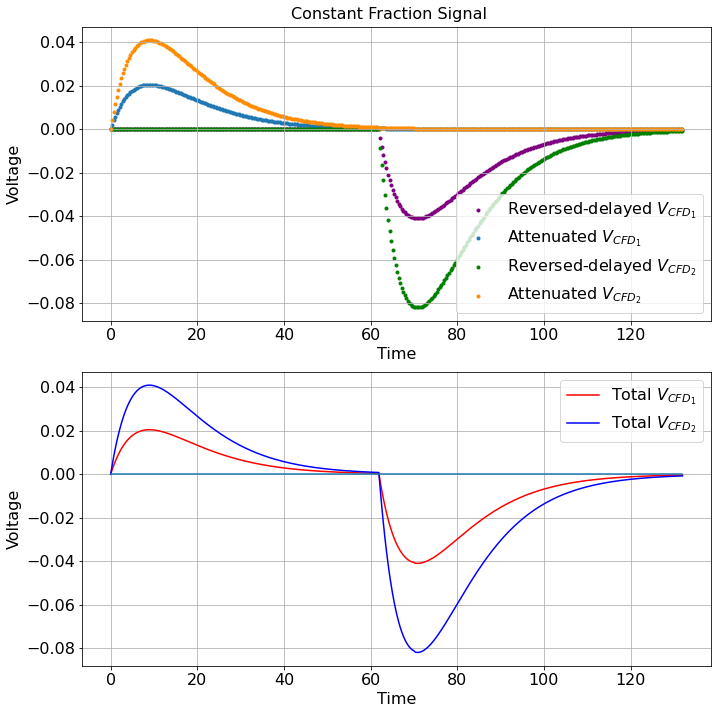

In [6]:
# Plotting and labelling for individual attenuated and reversed-delayed pulse
# For plotting zero crossover horizontal line
yref=[]
xref=np.linspace(min(t1_new[0],t2_new[0]),max(t1_new[-1],t2_new[-1]),10)
for i in range(len(xref)):
    yref.append(0)
yref=np.array(yref)
# Main plots
fig, ax = plt.subplots(2)
fig.set_size_inches(10,10) # size of figure
fig.tight_layout(pad=3) # spacing between subplots
ax[0].scatter(t1_new,V_CFD1_reversed_delayed,label=r'Reversed-delayed $V_{CFD_1}$',color='purple',marker='.')
ax[0].scatter(t1_new,V_CFD1_attenuated_extended,label=r'Attenuated $V_{CFD_1}$',marker='.')
ax[0].scatter(t2_new,V_CFD2_reversed_delayed,label=r'Reversed-delayed $V_{CFD_2}$',color='green',marker='.')
ax[0].scatter(t2_new,V_CFD2_attenuated_extended,label=r'Attenuated $V_{CFD_2}$',color='darkorange',marker='.')
ax[1].plot(t1_new,V_CFD1_total,label=r'Total $V_{CFD_1}$',color='red')
ax[1].plot(t2_new,V_CFD2_total,label=r'Total $V_{CFD_2}$',color='blue')
ax[1].plot(xref,yref)
for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=16)
    ax[i].yaxis.set_tick_params(labelsize=16)
    ax[i].set_xlabel('Time',fontsize=16)
    ax[i].set_ylabel('Voltage',fontsize=16)
    ax[i].grid()
ax[0].legend(loc='lower right',fontsize=16)
ax[1].legend(loc='upper right',fontsize=16)
plt.suptitle('Constant Fraction Signal',fontsize=16)
plt.show()

In [7]:
# Let's calculate time at which constant fraction signal crosses zero crossover for both signals
# Form logic pulse for signals using this time of zero crossover

# Finding time at which signal 1 crosses zero crossover
for i in range(len(V_CFD1_total)):
    if i>0:
        if V_CFD1_total[i]*a<=0:
            crossover_index1=i-1
    a=V_CFD1_total[i]
t_crossover1=t1_new[crossover_index1]
print("Time at which signal 1 passes through zero crossover is ",t_crossover1)

# Finding time at which signal 2 crosses zero crossover
for i in range(len(V_CFD2_total)):
    if i>0:
        if V_CFD2_total[i]*a<=0:
            crossover_index2=i-1
    a=V_CFD2_total[i] 
t_crossover2=t2_new[crossover_index2]
print("Time at which signal 2 passes through zero crossover is ",t_crossover2)

# Create logic pulses for signals using this time of zero crossover
logic_pulse1=[]
logic_pulse2=[]
# For signal 1
for i in range(len(t1_new)):
    if t_crossover1<=t1_new[i]<=(t_crossover1+t_monoshoot):
        logic_pulse1.append(1)
    else:
        logic_pulse1.append(0)
logic_pulse1=np.array(logic_pulse1)
# For signal 2       
for i in range(len(t2_new)):
    if t_crossover2<=t2_new[i]<=(t_crossover2+t_monoshoot):
        logic_pulse2.append(1)
    else:
        logic_pulse2.append(0)
logic_pulse2=np.array(logic_pulse2)

Time at which signal 1 passes through zero crossover is  61.90954773869347
Time at which signal 2 passes through zero crossover is  61.90954773869347


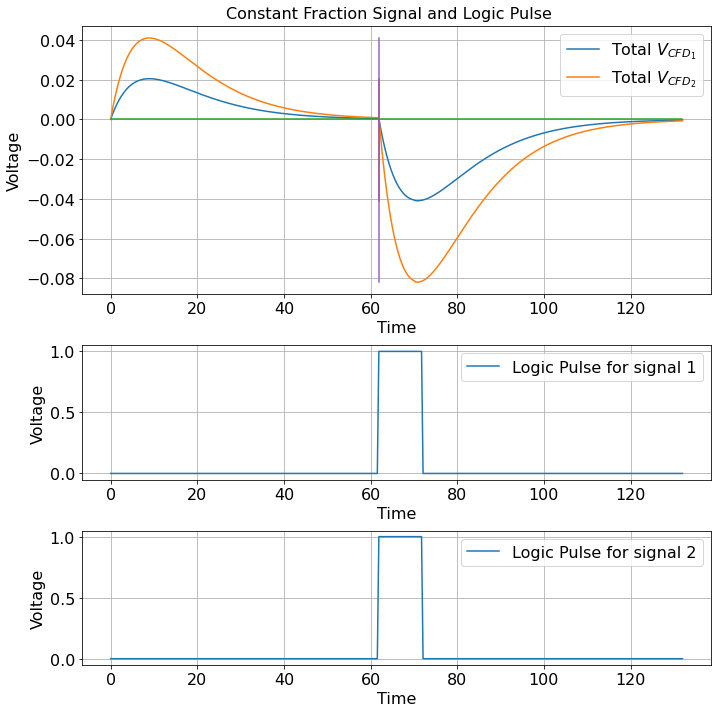

In [8]:
# Let's plot constant fraction signal, logic pulses and t_crossover

# For plotting vertical line corresponding to time at which signal passes through zero crossover
x1=[]
x2=[]
y1=np.linspace(min(V_CFD1_total),max(V_CFD1_total),10)
y2=np.linspace(min(V_CFD2_total),max(V_CFD2_total),10)
for i in range(len(y1)):
    x1.append(t_crossover1) # for signal 1
x1=np.array(x1)
for i in range(len(y2)):
    x2.append(t_crossover2) # for signal 2
x2=np.array(x2)
# Plotting and labelling
fig, ax = plt.subplots(3,1,figsize=(10,10), gridspec_kw={'height_ratios': [2,1,1]})
#fig.set_size_inches(10,15) # size of figure
fig.tight_layout(pad=3) # spacing between subplots
ax[0].plot(t1_new,V_CFD1_total,label=r'Total $V_{CFD_1}$') # Constant Fraction signal 1
ax[0].plot(t2_new,V_CFD2_total,label=r'Total $V_{CFD_2}$') # Constant Fraction signal 2
ax[0].plot(xref,yref) # zero crossover line
ax[0].plot(x1,y1) # t_crossover line for signal 1
ax[0].plot(x2,y2) # t_crossover line for signal 2
ax[1].plot(t1_new,logic_pulse1,label='Logic Pulse for signal 1') # Logic pulses
ax[2].plot(t2_new,logic_pulse2,label='Logic Pulse for signal 2')
for i in range(3):
    ax[i].xaxis.set_tick_params(labelsize=16)
    ax[i].yaxis.set_tick_params(labelsize=16)
    ax[i].set_xlabel('Time',fontsize=16)
    ax[i].set_ylabel('Voltage',fontsize=16)
    ax[i].legend(loc='upper right',fontsize=16)
    ax[i].grid()
plt.suptitle('Constant Fraction Signal and Logic Pulse',fontsize=16)
plt.show()

• The attenuation factor and time delay are chosen such that the constant fraction signal is smooth. The noise and signal strength are also taken into account.

• The plot drawn above shows the triggering of logic pulse corresponding to the time at which signal passes from the zero crossover line.

• The triggering of logic pulse is initiated by the comparator with zero crossover voltage as the threshold voltage.

• Above plot clearly shows that the time at which signal passes from the zero crossover line is same for both signals i.e. $t_z$ = 61.9.

#### Thus, the amplitude-dependent walk problem is resolved by CFD.